# Extracting Bell Internet review data from dslreports.com

### Using BeautifulSoup to extract review data of the ISP Bell Canada from dslreports.com

In [1]:
import os
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import time
from datetime import date, timedelta

## 1. Extracting data from a single web page
### The web page https://www.dslreports.com/comments/412?1=1&p=1 holds the most recent reviews of Bell Internet.

In [2]:
url = 'https://www.dslreports.com/comments/412?1=1&p=1'

data = requests.get(url).text
data[:1000]  # display the first 30 characters of the string data.

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"\n   "http://www.w3.org/TR/html4/loose.dtd">\n<html  prefix="og: http://ogp.me/ns#"><head><meta http-equiv="X-UA-Compatible" content="IE=EDGE">\n<meta http-equiv="cache-control" content="no-cache">\n<link rel="canonical" href="http://www.dslreports.com/comments/412?1=1&p=1" >\n<title>Bell Fibe Internet : All reviews | DSLReports, ISP Information</title><meta http-equiv="Content-type" content="text/html; charset=UTF-8">\n<meta name="description" content="Bell Fibe Internet : All reviews">\n<link rel="apple-touch-icon-precomposed" sizes="57x57" href="/apple-touch-icon-57x57.png?1">\n<link rel="apple-touch-icon-precomposed" sizes="114x114" href="/apple-touch-icon-114x114.png?1" >\n<link rel="apple-touch-icon-precomposed" sizes="72x72" href="/apple-touch-icon-72x72.png?1" >\n<link rel="apple-touch-icon-precomposed" sizes="144x144" href="/apple-touch-icon-144x144.png?1" >\n<link rel="apple-touch-icon-precomposed" sizes="120x120"

In [3]:
soup = BeautifulSoup(data, 'html5lib')
type(soup)

bs4.BeautifulSoup

### 1.1 Looking inside the soup

In [4]:
soup.title.text

'Bell Fibe Internet : All reviews | DSLReports, ISP Information'

In [5]:
soup.get_text()[:1000]

'\n\n\nBell Fibe Internet : All reviews | DSLReports, ISP Information\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nvar deferredJSFiles;\nvar deferredJSProgressLength=0;\nvar deferredJSProgress=0;\nvar deferredJSFileDone = new Array();\n\nvar _deferredJSFiles = [\'//i.dslr.net/css/dslrjsbundle.js?1622595206\', \'\'];\n\n\nfunction _downloadJSAtOnload() {\n    var s = document.getElementsByTagName("script");\n    for(var i=0; i<s.length; i++) {\n        if (s[i].src.indexOf(_deferredJSFiles[0]) > -1) {\n            return;\n        }\n    }\n    deferredJSFiles = _deferredJSFiles.slice();\n    deferredJSProgressLength = deferredJSFiles.length - 1;\n    downloadJSAtOnload();\n}\n\nfunction downloadJSAtOnload() {\n   try {\n      if (!deferredJSFiles.length)\n          return;\n      var deferredJSFile = deferredJSFiles.shift();\n      if (deferredJSFile.length) {\n          if (!deferredJSFileDone[deferredJSFile]) {\n              var e = document.createElement(\'script\');\n              e

In [6]:
print(soup.prettify()[:1000])

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html prefix="og: http://ogp.me/ns#">
 <head>
  <meta content="IE=EDGE" http-equiv="X-UA-Compatible"/>
  <meta content="no-cache" http-equiv="cache-control"/>
  <link href="http://www.dslreports.com/comments/412?1=1&amp;p=1" rel="canonical"/>
  <title>
   Bell Fibe Internet : All reviews | DSLReports, ISP Information
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="Bell Fibe Internet : All reviews" name="description"/>
  <link href="/apple-touch-icon-57x57.png?1" rel="apple-touch-icon-precomposed" sizes="57x57"/>
  <link href="/apple-touch-icon-114x114.png?1" rel="apple-touch-icon-precomposed" sizes="114x114"/>
  <link href="/apple-touch-icon-72x72.png?1" rel="apple-touch-icon-precomposed" sizes="72x72"/>
  <link href="/apple-touch-icon-144x144.png?1" rel="apple-touch-icon-precomposed" sizes="144x144"/>
  <link href="/apple-touch-icon-

### 1.2 Extracting data from the first review

In [7]:
review = soup.find('a', {'name':'review1'}).parent
print(review.prettify())

<div>
 <a name="review1">
 </a>
 <table width="100%">
  <tbody>
   <tr>
    <td align="LEFT" valign="TOP">
     <div class="wiki">
      <h4>
       Review by
       <b>
        ych
       </b>
       <a href="/useremail/u/2012275">
        <img alt="See Profile" border="0" height="11" src="//i.dslr.net/bb/profile.gif" width="16"/>
       </a>
       <a name="96808">
       </a>
      </h4>
     </div>
     <ul class="niceList">
      <li>
       Location: Montreal, QC, Canada
       <br/>
      </li>
      <li>
       Cost: $57 per month (12 month contract)
      </li>
      <li>
       Install:  about
       <b>
        2 days
       </b>
      </li>
      <li>
       No Cap
      </li>
      <li>
       <img alt="Telco party" border="0" height="16" src="//i.dslr.net/silk/bell.png" style="vertical-align:middle;" title="Telco party" width="16"/>
       <b>
        Bell Canada
       </b>
      </li>
     </ul>
     <span style="font-size:120%; line-height:1.5em;">
     </span>
    </t

### 1.2.1 Let us first try to get the date the review was posted or updated

In [8]:
# The 2nd div tag in review1 includes the elapsed time since the review was posted or updated
len(review.find_all('div'))

5

In [9]:
review.find_all('div')[1]

<div style="float:right"><br/><small>member for 47 days,  7 visits, last login: a few hours ago</small><br/>updated 46 days ago</div>

In [10]:
# The elapsed time since the review was posted or updated
# We w will store the attributes of the review in a dict
review_data = dict()
review_date_string = review.find_all('div')[1].find(string= re.compile('(updated)|(lodged)'))
review_data['days_or_years_since_review'] = ' '.join(review_date_string.split(' ')[1:3])
review_data['days_or_years_since_review']

'46 days'

### 1.2.2 Getting the other attributes of the first review  

In [11]:
# The first table within review1 includes all the required data aside from the posting date.
review_table = review.find('table')
print(review_table.prettify())

<table width="100%">
 <tbody>
  <tr>
   <td align="LEFT" valign="TOP">
    <div class="wiki">
     <h4>
      Review by
      <b>
       ych
      </b>
      <a href="/useremail/u/2012275">
       <img alt="See Profile" border="0" height="11" src="//i.dslr.net/bb/profile.gif" width="16"/>
      </a>
      <a name="96808">
      </a>
     </h4>
    </div>
    <ul class="niceList">
     <li>
      Location: Montreal, QC, Canada
      <br/>
     </li>
     <li>
      Cost: $57 per month (12 month contract)
     </li>
     <li>
      Install:  about
      <b>
       2 days
      </b>
     </li>
     <li>
      No Cap
     </li>
     <li>
      <img alt="Telco party" border="0" height="16" src="//i.dslr.net/silk/bell.png" style="vertical-align:middle;" title="Telco party" width="16"/>
      <b>
       Bell Canada
      </b>
     </li>
    </ul>
    <span style="font-size:120%; line-height:1.5em;">
    </span>
   </td>
   <td align="RIGHT" nowrap="" valign="CENTER">
    <b>
     Install Co-o

In [12]:
# The table has only two cells as you can see below. 
print('Number of rows:', len(review_table.find_all('tr')))
print('Number of columns:',len(review_table.find_all('td')))

Number of rows: 1
Number of columns: 2


#### Extracting data from the first cell

In [13]:
first_cell = review_table.find_all('td')[0]
print(first_cell.prettify())

<td align="LEFT" valign="TOP">
 <div class="wiki">
  <h4>
   Review by
   <b>
    ych
   </b>
   <a href="/useremail/u/2012275">
    <img alt="See Profile" border="0" height="11" src="//i.dslr.net/bb/profile.gif" width="16"/>
   </a>
   <a name="96808">
   </a>
  </h4>
 </div>
 <ul class="niceList">
  <li>
   Location: Montreal, QC, Canada
   <br/>
  </li>
  <li>
   Cost: $57 per month (12 month contract)
  </li>
  <li>
   Install:  about
   <b>
    2 days
   </b>
  </li>
  <li>
   No Cap
  </li>
  <li>
   <img alt="Telco party" border="0" height="16" src="//i.dslr.net/silk/bell.png" style="vertical-align:middle;" title="Telco party" width="16"/>
   <b>
    Bell Canada
   </b>
  </li>
 </ul>
 <span style="font-size:120%; line-height:1.5em;">
 </span>
</td>



In [14]:
try:
    rev_by = first_cell.find('div').text.split(' ')
    if rev_by[0].lower() + '_' + rev_by[1] == 'review_by':
        review_data['review_by'] = ' '.join(rev_by[2:]).strip()
except AttributeError:
    pass

try:
    review_data['name'] = first_cell.find_all('a')[1]['name']
except AttributeError:
    pass

for item in first_cell.find_all('li'):
    item = item.text.split(' ')
    key = item[0].strip(':').lower()  
    if key == 'location':
        review_data[key] = ' '.join(item[1:])
    elif key == 'cost':
       #review_data[key] = re.findall('^(?=\D*)\$(\d+)(?=\D+)',' '.join(item[1:]))[0]
        val = item[1].strip('$')
        if val.isdigit():
            review_data[key] = val
    elif key == 'install':
       #review_data[key] = item[3]
       review_data[key] = re.findall('^\D*(\d+)\D*', ' '.join(item[1:]))[0]

try:
    review_data['provider'] = first_cell.find('img', {'alt': 'Telco party'}).find_next_sibling('b').text
except AttributeError:
    pass

print(review_data)

{'days_or_years_since_review': '46 days', 'review_by': 'ych', 'name': '96808', 'location': 'Montreal, QC, Canada', 'cost': '57', 'install': '2', 'provider': 'Bell Canada'}


#### Extracting data from the second cell

In [15]:
second_cell = review_table.find_all('td')[1]
print(second_cell.prettify())

<td align="RIGHT" nowrap="" valign="CENTER">
 <b>
  Install Co-ordination
 </b>
 :
 <img align="ABSMIDDLE" height="10" src="//i.dslr.net/bars/50_sm.gif" width="70"/>
 <br/>
 <b>
  Connection reliability
 </b>
 :
 <img align="ABSMIDDLE" height="10" src="//i.dslr.net/bars/50_sm.gif" width="70"/>
 <br/>
 <b>
  Tech Support
 </b>
 :
 <img align="ABSMIDDLE" height="10" src="//i.dslr.net/bars/50_sm.gif" width="70"/>
 <br/>
 <b>
  Services
 </b>
 :
 <img align="ABSMIDDLE" height="10" src="//i.dslr.net/bars/50_sm.gif" width="70"/>
 <br/>
 <small>
  <font color="#808080">
   (ratings match consensus)
   <br/>
  </font>
 </small>
</td>


In [16]:
for (key, value)  in zip(second_cell.find_all('b'), second_cell.find_all('img')):
    key = key.text
    key = '_'.join(key.split(' ')).lower()
    review_data[key]  = re.findall('\D*(\d*)', value['src'])[0]
    
review_data

{'days_or_years_since_review': '46 days',
 'review_by': 'ych',
 'name': '96808',
 'location': 'Montreal, QC, Canada',
 'cost': '57',
 'install': '2',
 'provider': 'Bell Canada',
 'install_co-ordination': '50',
 'connection_reliability': '50',
 'tech_support': '50',
 'services': '50'}

### 1.3 Creating a list that holds all reviews in a single web page

In [17]:
# Find all reviews in a single web page:
reviews_list = soup.find_all('a', {'name':re.compile('review\d')})
reviews_list

[<a name="review1"> </a>,
 <a name="review2"> </a>,
 <a name="review3"> </a>,
 <a name="review4"> </a>,
 <a name="review5"> </a>,
 <a name="review6"> </a>,
 <a name="review7"> </a>,
 <a name="review8"> </a>,
 <a name="review9"> </a>,
 <a name="review10"> </a>]

In [18]:
#To find the content of the reviews, we need the parents of the 'a' tags
reviews_list = [review.parent for review  in reviews_list]
print(reviews_list[0].prettify())

<div>
 <a name="review1">
 </a>
 <table width="100%">
  <tbody>
   <tr>
    <td align="LEFT" valign="TOP">
     <div class="wiki">
      <h4>
       Review by
       <b>
        ych
       </b>
       <a href="/useremail/u/2012275">
        <img alt="See Profile" border="0" height="11" src="//i.dslr.net/bb/profile.gif" width="16"/>
       </a>
       <a name="96808">
       </a>
      </h4>
     </div>
     <ul class="niceList">
      <li>
       Location: Montreal, QC, Canada
       <br/>
      </li>
      <li>
       Cost: $57 per month (12 month contract)
      </li>
      <li>
       Install:  about
       <b>
        2 days
       </b>
      </li>
      <li>
       No Cap
      </li>
      <li>
       <img alt="Telco party" border="0" height="16" src="//i.dslr.net/silk/bell.png" style="vertical-align:middle;" title="Telco party" width="16"/>
       <b>
        Bell Canada
       </b>
      </li>
     </ul>
     <span style="font-size:120%; line-height:1.5em;">
     </span>
    </t

## 2. Building a function that extracts data from all reviews contained in a dslreports.com reviews page
#### This function is built using the code that we wrote above. Its returns review data in a Pandas DataFrame.

In [19]:

def review_data_collection(soup):
    '''
    Extract review data from dslreports.com 
    Arguments: soup: a BeautifulSoup object that represents a single DSL Reports web page that contains ISP reviews.
    Returns: a Pandas DataFrame that contains review data using the following columns:
        ['review_by', 'review_id', 'days_or_years_since_review', 'location', 'cost', 
        'installation_time', 'provider', 'pre_sales_information', 'install_co-ordination', 
        'connection_reliability', 'tech_support', 'services', 'value_for_money']
    '''
    
    # Find all reviews in a single web page:
    try:
        reviews_list = soup.find_all('a', {'name':re.compile('review\d')})
        if reviews_list == []:
            print('No reviews in this page. End.')
            return
    except IndexError as ie:
        print(ie)
        return
        
    reviews_list = [review.parent for review  in reviews_list]


    # We initialize the list review_data_list that will hold dictionaries that contain the different attributes of each review
    review_data_list = []

    #print('Rows', end = '\t')
    i=0
    for review in reviews_list:
        # initialize a dict that will hold the data of each row (review)
        review_data = dict()
        i+=1
        #print(i, end = '\t')

        # Find when a review was posted or updated
        # Remove from the soup the content of the div tag that include the information about other reviews 
        # by the same reviewer. (they use the class 'soft-tbl-10'). This is only present is some reviews.
        try:
            review.find('div', class_ = 'soft-tbl-10').extract()
        except AttributeError:
            pass
        
        # Some reviews have attached pictures within a div tag
        # Attachments: <div class="news_tiny_center"> <!-- tiny_attach --> ....
        # This should also be removed from the soup.
        try:
            for attach_tag in review.find_all(text=re.compile('tiny_attach')):
                  attach_tag.parent.extract()
        except AttributeError:
            pass       

        # After the soup clean-up above, the required 'age' of a review will always be included within the 2nd div tag.
        try:
            review_date_string = review.find_all('div')[1].find(string = re.compile('(updated)|(lodged)'))
            review_data['days_or_years_since_review'] = ' '.join(review_date_string.split(' ')[1:3])
        except AttributeError:
            pass


        # The first table within each review includes all the required data aside from the posting date.
        # The table has one row and two cells.
        review_table = review.find('table')

        # Scrap the review data included in the first cell
        first_cell = review_table.find_all('td')[0]
        
        try:
            rev_by = first_cell.find('div').text.split(' ')
            if rev_by[0].lower() + '_' + rev_by[1] == 'review_by':
                review_data['review_by'] = ' '. join(rev_by[2:])
            else:
                pass
        except AttributeError:
            pass

        try:
            review_data['review_id'] = first_cell.find_all('a')[1]['name']
        except:
            pass

        for item in first_cell.find_all('li'):
            item = item.text.split(' ')
            key = item[0].strip(':').lower()  
            if key == 'location':
                review_data[key] = ' '.join(item[1:])
            elif key == 'cost':
                val = item[1].strip('$')
                if val.isdigit():
                    review_data[key] = val
            elif key == 'install':
                review_data['installation_time'] = re.findall('^\D*(\d+)\D*', ' '.join(item[1:]))[0]

        try:
            review_data['provider'] = review_table.find_all('td')[0].find('img', {'alt': 'Telco party'}).find_next_sibling('b').text
        except AttributeError:
            pass


        # Scrap the review data included in the 2nd cell
        # The ratings are included in the name of images. See this example:
        # <b>Install Co-ordination</b>:<IMG WIDTH=70 HEIGHT=10 ALIGN=ABSMIDDLE SRC="//i.dslr.net/bars/50_sm.gif">
        
        second_cell = review_table.find_all('td')[1]
        for (key, value)  in zip(second_cell.find_all('b'), second_cell.find_all('img')):
            key = key.text
            key = '_'.join(key.split(' ')).lower()
            review_data[key]  = re.findall('\D*(\d*)', value['src'])[0]


        # Finally we append the data of each row to the list
        review_data_list.append(review_data)
     
    #return a dataframe using the list above and return it.
    
    col = ['review_by', 'review_id', 'days_or_years_since_review', 'location', \
            'cost', 'installation_time', 'provider', 'pre_sales_information', \
            'install_co-ordination', 'connection_reliability', 'tech_support', 'services', 'value_for_money']
    
    return pd.DataFrame(review_data_list, columns = col)
    

## 3. Extracting review data for the 120+ web pages that contain Bell Internet reviews on dslreports.com

### 3.1 Identifying the tags that hold pagination information

In [20]:
print(soup.prettify()[:1000])

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html prefix="og: http://ogp.me/ns#">
 <head>
  <meta content="IE=EDGE" http-equiv="X-UA-Compatible"/>
  <meta content="no-cache" http-equiv="cache-control"/>
  <link href="http://www.dslreports.com/comments/412?1=1&amp;p=1" rel="canonical"/>
  <title>
   Bell Fibe Internet : All reviews | DSLReports, ISP Information
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="Bell Fibe Internet : All reviews" name="description"/>
  <link href="/apple-touch-icon-57x57.png?1" rel="apple-touch-icon-precomposed" sizes="57x57"/>
  <link href="/apple-touch-icon-114x114.png?1" rel="apple-touch-icon-precomposed" sizes="114x114"/>
  <link href="/apple-touch-icon-72x72.png?1" rel="apple-touch-icon-precomposed" sizes="72x72"/>
  <link href="/apple-touch-icon-144x144.png?1" rel="apple-touch-icon-precomposed" sizes="144x144"/>
  <link href="/apple-touch-icon-

In [21]:
soup.find_all(string =  re.compile('Reviews'))

['Reviews',
 '(1212 Reviews)',
 'My Other Reviews',
 '(1212 Reviews)',
 'ISP Reviews']

In [22]:
print(soup.find_all(string =  re.compile('Reviews'))[1].parent.parent.prettify())

<div class="ks-pagination-links" style="">
 <ul>
  <li class="next">
   <a href="/comments/412?1=1&amp;p=2">
    »
   </a>
  </li>
  <li class="next">
   <a href="/comments/412?1=1&amp;p=11">
    »»
   </a>
  </li>
  <li class="current">
   1
  </li>
  <li>
   <a href="/comments/412?1=1&amp;p=2">
    2
   </a>
  </li>
  ··
  <li>
   <a href="/comments/412?1=1&amp;p=122">
    122
   </a>
  </li>
 </ul>
 <span class="pager_help">
  (1212 Reviews)
 </span>
</div>


In [23]:
# The number of review pages
int(soup.find('div', class_ = 'ks-pagination-links').find_all('li')[-1].text)

122

In [24]:
# Get the BeautifulSoup object oF the last review page (the least recent reviews)
url = 'https://www.dslreports.com/comments/412?1=1&p=122'

data = requests.get(url).text
soup = BeautifulSoup(data, 'html5lib')

In [25]:
# We can use the  tag class 'ks-pagination-links'to easily find the pagination info.  
# Note that the first page includes class='next' and the last one includes class='noclick'
print(soup.find('div', class_ = 'ks-pagination-links').prettify())

<div class="ks-pagination-links" style="">
 <ul>
  <li class="noclick">
   »
  </li>
  <li class="noclick">
   »»
  </li>
  <li>
   <a href="/comments/412?1=1&amp;p=1">
    1
   </a>
  </li>
  ··
  <li>
   <a href="/comments/412?1=1&amp;p=121">
    121
   </a>
  </li>
  <li class="current">
   122
  </li>
 </ul>
 <span class="pager_help">
  (1212 Reviews)
 </span>
</div>


### 3.2 Extracting review data for the web pages that contain reviews and writing it into a pandas DataFrame

In [26]:
print('Extracting review data from dslreports.com')
print('Processing page', end = '\t')

# Initialize a list that will hold the DataFrames returned by the function review_data_collection(soup)
list_reviews_df = []

pagination_flag = 'next'
page_number = 1
while(pagination_flag == 'next'):
    print(page_number, end = '\t')
    url = 'https://www.dslreports.com/comments/412?1=1&p=' + str(page_number)
    response = requests.get(url, timeout = 5)
    data = response.text
    soup = BeautifulSoup(data, 'html5lib')
    list_reviews_df.append(review_data_collection(soup))
    pagination_tag = soup.find('div', class_ = 'ks-pagination-links')
    try:
        pagination_flag = pagination_tag.li['class'][0]
    except AttributeError as ar:
        print(ar)
        print(f'Pagination tag: {pagination_tag}')
        break
    page_number += 1
    # Adding random sleep delays to emulate the behaviour of a stanbdar user and
    # avoid being blocked by the dslreports.com web server.
    time.sleep(np.random.randint(0, 3))

reviews_df = pd.concat(list_reviews_df, ignore_index=True)

Extracting review data from dslreports.com
Processing page	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	26	27	28	29	30	31	32	33	34	35	36	37	38	39	40	41	42	43	44	45	46	47	48	49	50	51	52	53	54	55	56	57	58	59	60	61	62	63	64	65	66	67	68	69	70	71	72	73	74	75	76	77	78	79	80	81	82	83	84	85	86	87	88	89	90	91	92	93	94	95	96	97	98	99	100	101	102	103	104	105	106	107	108	109	110	111	112	113	114	115	116	117	118	119	120	121	122	No reviews in this page. End.


In [27]:
reviews_df.head(5)

,review_by,review_id,days_or_years_since_review,location,cost,installation_time,provider,pre_sales_information,install_co-ordination,connection_reliability,tech_support,services,value_for_money
0,ych,96808,46 days,"Montreal, QC, Canada",57,2,Bell Canada,NaN,50,50,50,50,NaN
1,RumClutch,95503,87 days,"Georgetown, ON, Canada",70,2,Bell Canada,100,75,100,75,75,50
2,El Quintron,95743,100 days,Tronna,80,8,Bell Canada,75,0,100,50,75,75
3,techie7k,96766,136 days,undisclosed location,NaN,NaN,NaN,100,100,100,100,100,100
4,KlatuuBarada,96762,147 days,"Laval, QC, Canada",80,2,NaN,75,75,100,50,75,50


### 3.3 Counting null values in each column

In [28]:
reviews_df.isnull().sum()  * 100 / len(reviews_df)

review_by                      0.082919
review_id                      3.233831
days_or_years_since_review     0.000000
location                       0.000000
cost                          12.852405
installation_time             42.620232
provider                      34.245439
pre_sales_information          6.135987
install_co-ordination          6.384743
connection_reliability         5.140962
tech_support                   6.965174
services                       6.384743
value_for_money                5.555556
dtype: float64

#### About 34% and 42% of reviews are missing the installation time and provider data, respectively. 
#### The 'provider' column doesn't hold any significant data. We know already that these reviews are for Bell Canada Internet service. We will drop this column.

In [29]:
reviews_df['provider'].value_counts()

Bell Canada    790
Rhythms          1
BellSouth        1
Digital          1
Name: provider, dtype: int64

In [30]:
reviews_df.drop('provider', axis=1, inplace=True)

### 3.4 Finding the date the review was posted or last updated

In [31]:
reviews_df['days_or_years_since_review'].sample(5)

125     8.5 years
795    17.5 years
863    18.1 years
375    13.5 years
279    12.4 years
Name: days_or_years_since_review, dtype: object

In [32]:
def find_date(elapsed_time):
    ''' 
    Get the review date from the elapsed time
    Arguments: elapsed_time (string) with the format 'x day(s)' or 'x year(s)' where x is the number of 
    days/years since a review was posted or last updated.
    Returns: date when the review was posted or last updated.
    '''
    
    num_years_or_days = elapsed_time.split(' ')
    # We want to match both year(day) and years(days)
    if 'year' in num_years_or_days[-1]:  
        review_date = date.today() - timedelta(days=float(num_years_or_days[0]) * 365.25)
    elif 'day' in num_years_or_days[-1]:
        review_date = date.today() - timedelta(days=float(num_years_or_days[0]))
    else:
        raise Exception('Check the elapsted time. This function expects the format x day(s) or x year(s) \
        where x is the number of days/years since a review was posted or last updated.')
    return review_date.isoformat()

In [33]:
reviews_df['date'] = reviews_df['days_or_years_since_review'].apply(find_date)

reviews_df.drop('days_or_years_since_review', axis=1, inplace=True)

In [34]:
reviews_df.sample(5)

,review_by,review_id,location,cost,installation_time,pre_sales_information,install_co-ordination,connection_reliability,tech_support,services,value_for_money,date
642,canadiancree,62662,"Perth, ON, Canada",NaN,NaN,50,50,0,0,0,0,2007-08-17
326,Cozman99,72672,"North York, ON, Canada",52,10,50,75,75,100,100,25,2009-02-15
719,MBaudot,55934,ON,45,NaN,50,75,75,75,100,75,2006-04-29
434,wiggy86,68627,"Oshawa, ON, Canada",30,NaN,0,0,50,0,0,0,2008-06-05
505,Deadpool0,33436,Canada,49,4,75,75,75,50,75,75,2008-03-23


## 4. Writing the Pandas DataFrame to a CSV file

In [35]:
os.makedirs('data', exist_ok=True)

with open('data/dslreports_reviews_Bell_Internet.csv',  'w') as f:
    reviews_df.to_csv(f)

## 5. Data visualization

### Charting yearly Bell ratings

### 5.1 Calculating yearly averages of the different ratings and the overall rating 

#### The reviewers select a satisfaction level of 0%, 25%, 50%, 75%, or 100% to rate the quality of different aspects of the service. 100% represents the highest satisfaction level.

In [36]:
reviews_df['date'] = pd.to_datetime(reviews_df['date'])
reviews_df.iloc[:, 3:-1] = reviews_df.iloc[:, 3:-1].astype(np.float64)

yearly_ratings_Bell = reviews_df.iloc[:,5:].groupby(reviews_df['date'].dt.year).agg(np.nanmean)
yearly_ratings_Bell['overall_rating'] = yearly_ratings_Bell.apply(np.nanmean, axis=1)
yearly_ratings_Bell

,pre_sales_information,install_co-ordination,connection_reliability,tech_support,services,value_for_money,overall_rating
date,,,,,,,
1999,46.666667,61.666667,41.666667,12.500000,40.000000,45.000000,41.250000
2000,67.592593,63.207547,75.000000,37.264151,65.384615,78.240741,64.448274
2001,69.191919,71.391753,75.000000,44.946809,66.326531,75.515464,67.062079
2002,59.615385,67.968750,77.611940,46.031746,65.625000,59.469697,62.720420
2003,69.620253,74.358974,85.060976,56.645570,68.437500,69.753086,70.646060
2004,67.696629,73.611111,74.175824,49.175824,62.500000,65.659341,65.469788
2005,67.000000,69.500000,71.568627,46.000000,57.352941,53.431373,60.808824
2006,59.659091,56.111111,63.888889,37.500000,51.704545,53.333333,53.699495
2007,41.400000,46.572581,51.587302,21.031746,29.400000,29.761905,36.625589


In [37]:
yearly_ratings_Bell.describe()

,pre_sales_information,install_co-ordination,connection_reliability,tech_support,services,value_for_money,overall_rating
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,58.866376,62.931889,69.267703,40.284095,53.070995,49.098747,55.586634
std,13.841224,13.851384,15.079423,15.838039,16.900153,19.038919,14.291590
min,37.948718,41.666667,41.666667,12.500000,25.253807,21.186441,33.375950
25%,46.363636,48.314394,57.308595,29.583333,41.730769,31.190476,43.722222
50%,62.468434,65.427303,72.875817,40.907895,55.208333,53.382353,60.319138
75%,68.860480,71.946592,78.480114,48.691015,65.696023,66.208791,65.769008
max,87.500000,92.857143,96.428571,78.571429,89.285714,78.240741,83.333333


### 5.2 Plotting line graphs for the different ratings

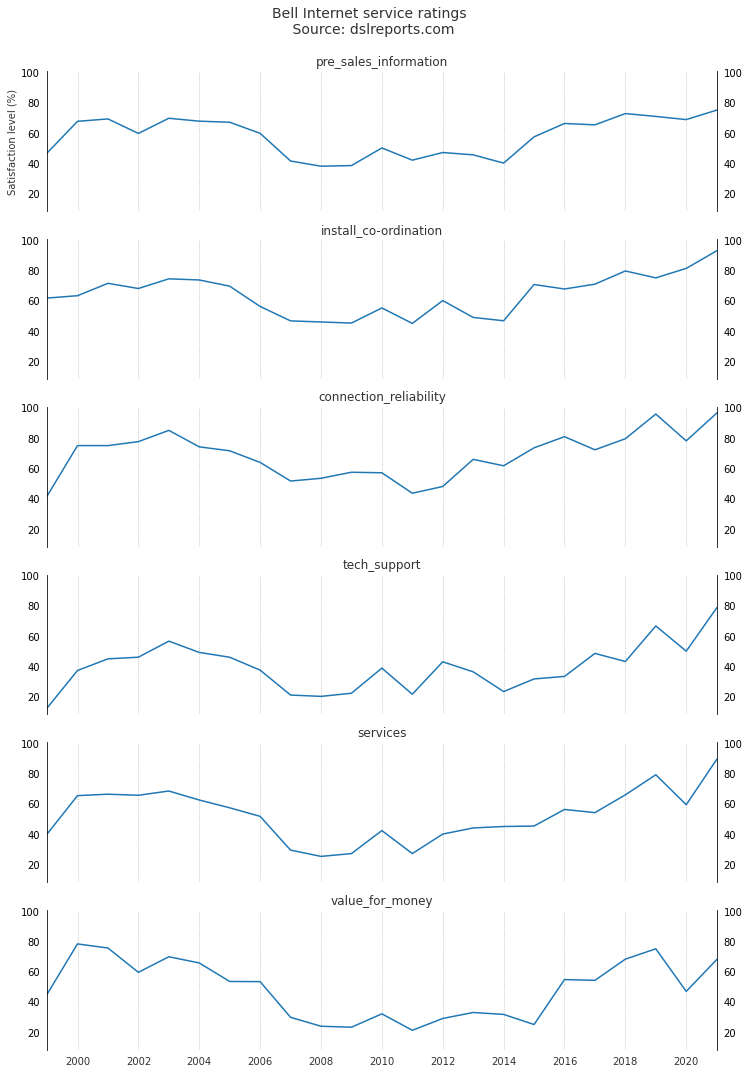

In [38]:
fig, axs = plt.subplots(6, sharex=True, sharey=True, figsize=(12, 18), frameon=False)

fig.suptitle('Bell Internet service ratings \n Source: dslreports.com', y=0.93, size=14, alpha=0.8)
for i in range(6):
    axs[i].plot(yearly_ratings_Bell.iloc[:-1, i], label=yearly_ratings_Bell.columns[i]);
    axs[i].set_title(yearly_ratings_Bell.columns[i], alpha=0.8);
    axs[i].tick_params(top=False, bottom=False, left=False, right=False, labelleft=True,labelright=True, labelbottom=False)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    axs[i].margins(x=0)
    axs[i].grid(axis='x', linestyle=':')
    
axs[0].set_ylabel('Satisfaction level (%)', alpha=0.8)

xticks_labels = yearly_ratings_Bell.index[yearly_ratings_Bell.index%2==0][:-1]
axs[5].set_xticks(ticks=xticks_labels, labels=xticks_labels, alpha=0.8)
axs[5].tick_params(top=False, bottom=False, left=False, right=False, labelleft=True,labelright=True, labelbottom=True) 
axs[5].spines['bottom'].set_visible(False)

plt.savefig('data/yearly_Bell_internet_service_ratings_dslreports.png')


### 5.3 Plotting yearly overall ratings of Bell internet service

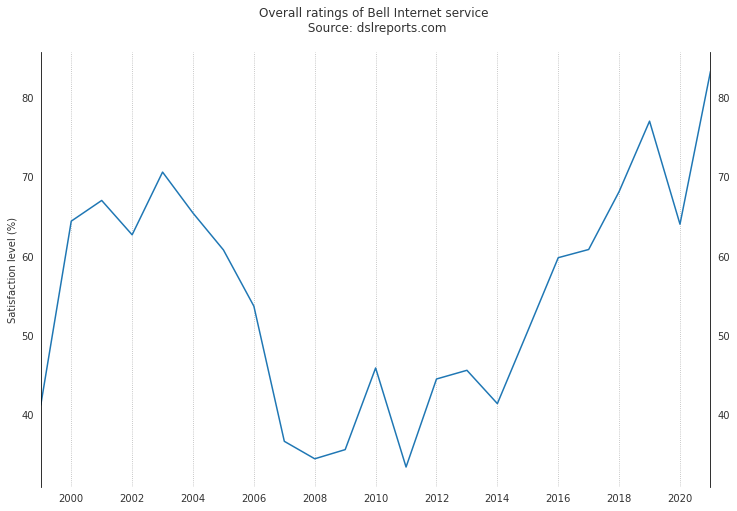

In [39]:
fig = plt.figure(figsize=(12, 8), frameon=False)


plt.plot(yearly_ratings_Bell.iloc[:-1,-1]);

plt.title('Overall ratings of Bell Internet service \n Source: dslreports.com', pad= 20, alpha=0.8)

plt.ylabel('Satisfaction level (%)', alpha=0.8)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True,labelright=True, labelbottom=True)
plt.margins(x=0)
xticks_labels = yearly_ratings_Bell.index[yearly_ratings_Bell.index%2==0][:-1]
plt.xticks(ticks=xticks_labels, labels=xticks_labels, alpha=0.8)
plt.yticks(alpha=0.8);
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig('data/yearly_Bell_internet_overall_service_ratings_dslreports.png')

plt.grid(axis='x', linestyle=':')


## 6. Future work

#### In this notebook, we used BeautifulSoup to extract review data of the ISP Bell Canada from dslreports.com and save it to a csv file.

#### We also used matplotlib to generate from the extracted data a couple charts that show Bell Internet service ratings.

#### This will later be extended to include:

#### 1. Extracting review data of other Canadian ISPs.
#### 2. Visualizing and analysing review data for the different Canadian ISPs.